# Import Package

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import math
#!pip install geopandas
from sklearn import preprocessing
import geopandas as gpd
#!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, learning_curve
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# Import Data

In [2]:
df = pd.read_excel("Real estate valuation data set.xlsx")

In [3]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
df = df.drop('No',axis=1)
df.columns = ['transaction date','house age','distance to the nearest MRT station','number of convenience stores','latitude','longitude','house price of unit area']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In this step, i deleted `No` column because it contain index value and rename the other value for easier interpretation

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

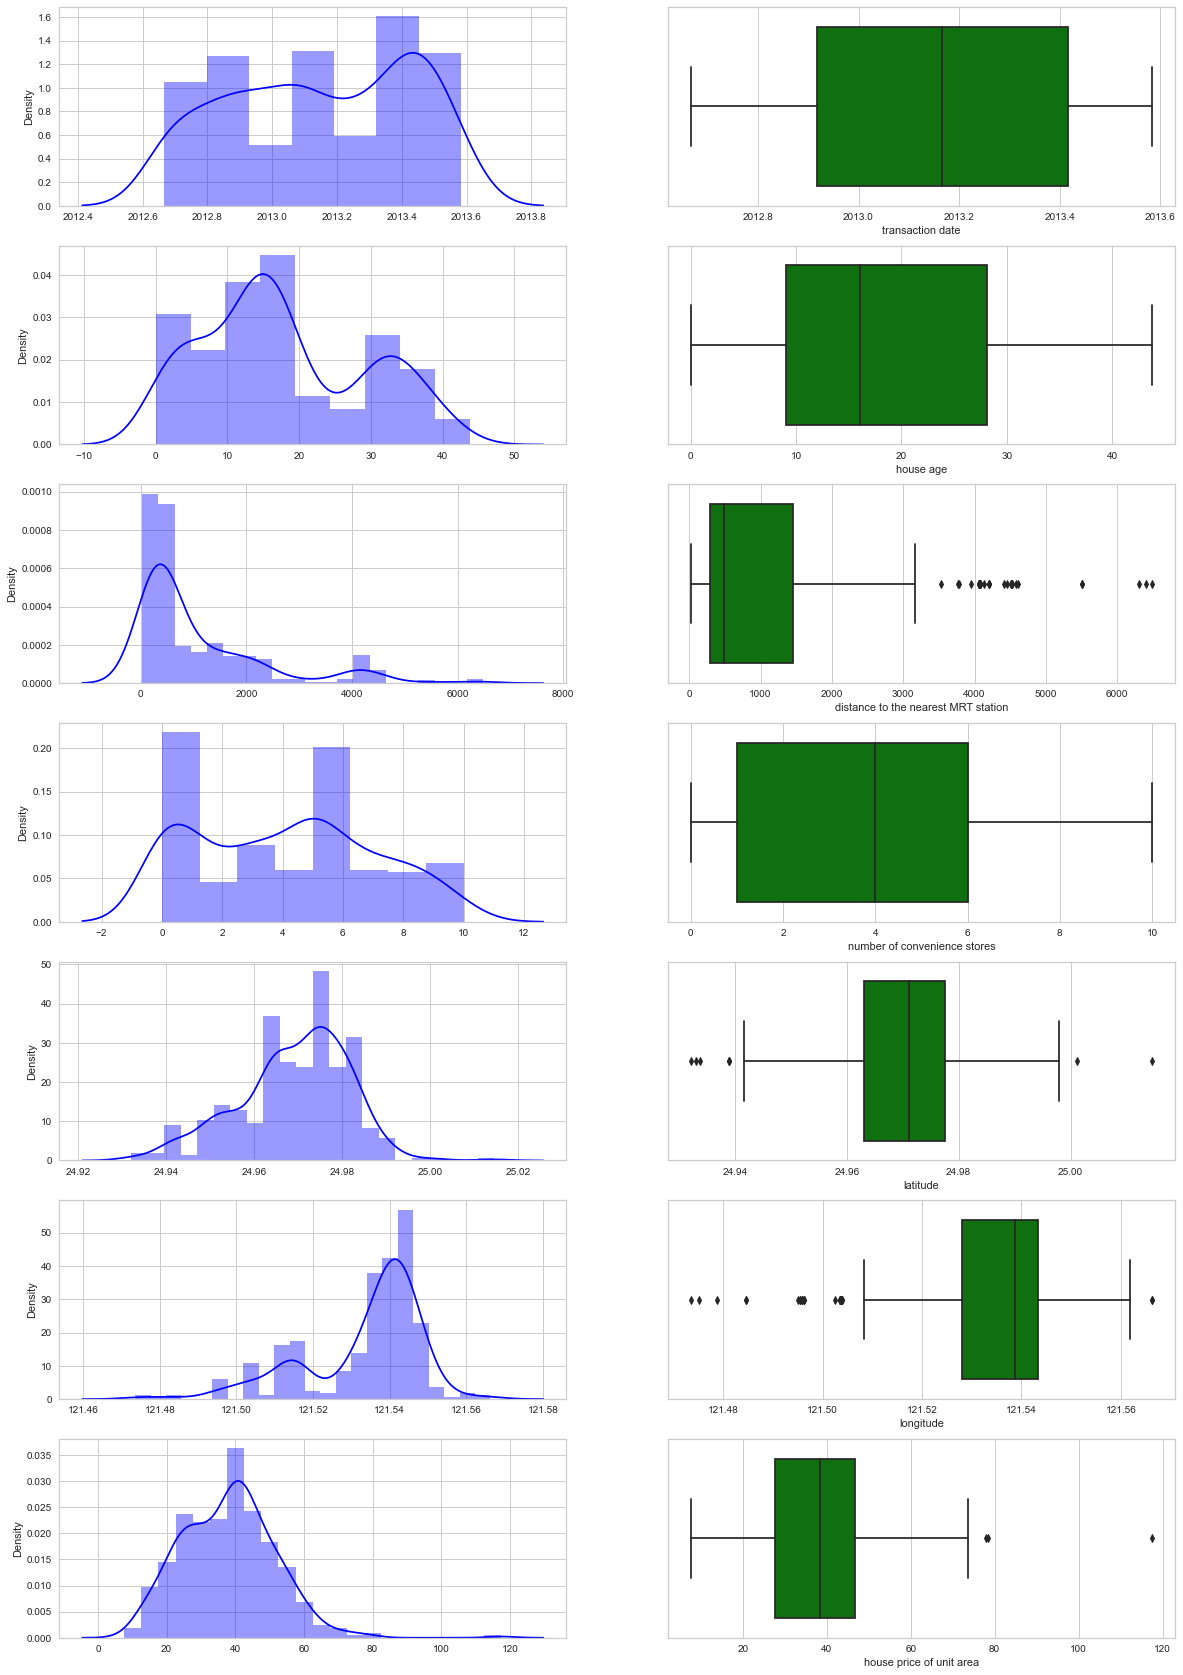

In [8]:
features = list(df.columns)
fig, ax = plt.subplots(len(features),2,figsize=(20,30))
for idx, column in enumerate(features):
    sns.distplot(
        x=df[column], 
        color='blue', 
        ax=ax[idx][0])
    sns.boxplot(
        x=df[column],
        color='green',
        ax=ax[idx][1]
        )

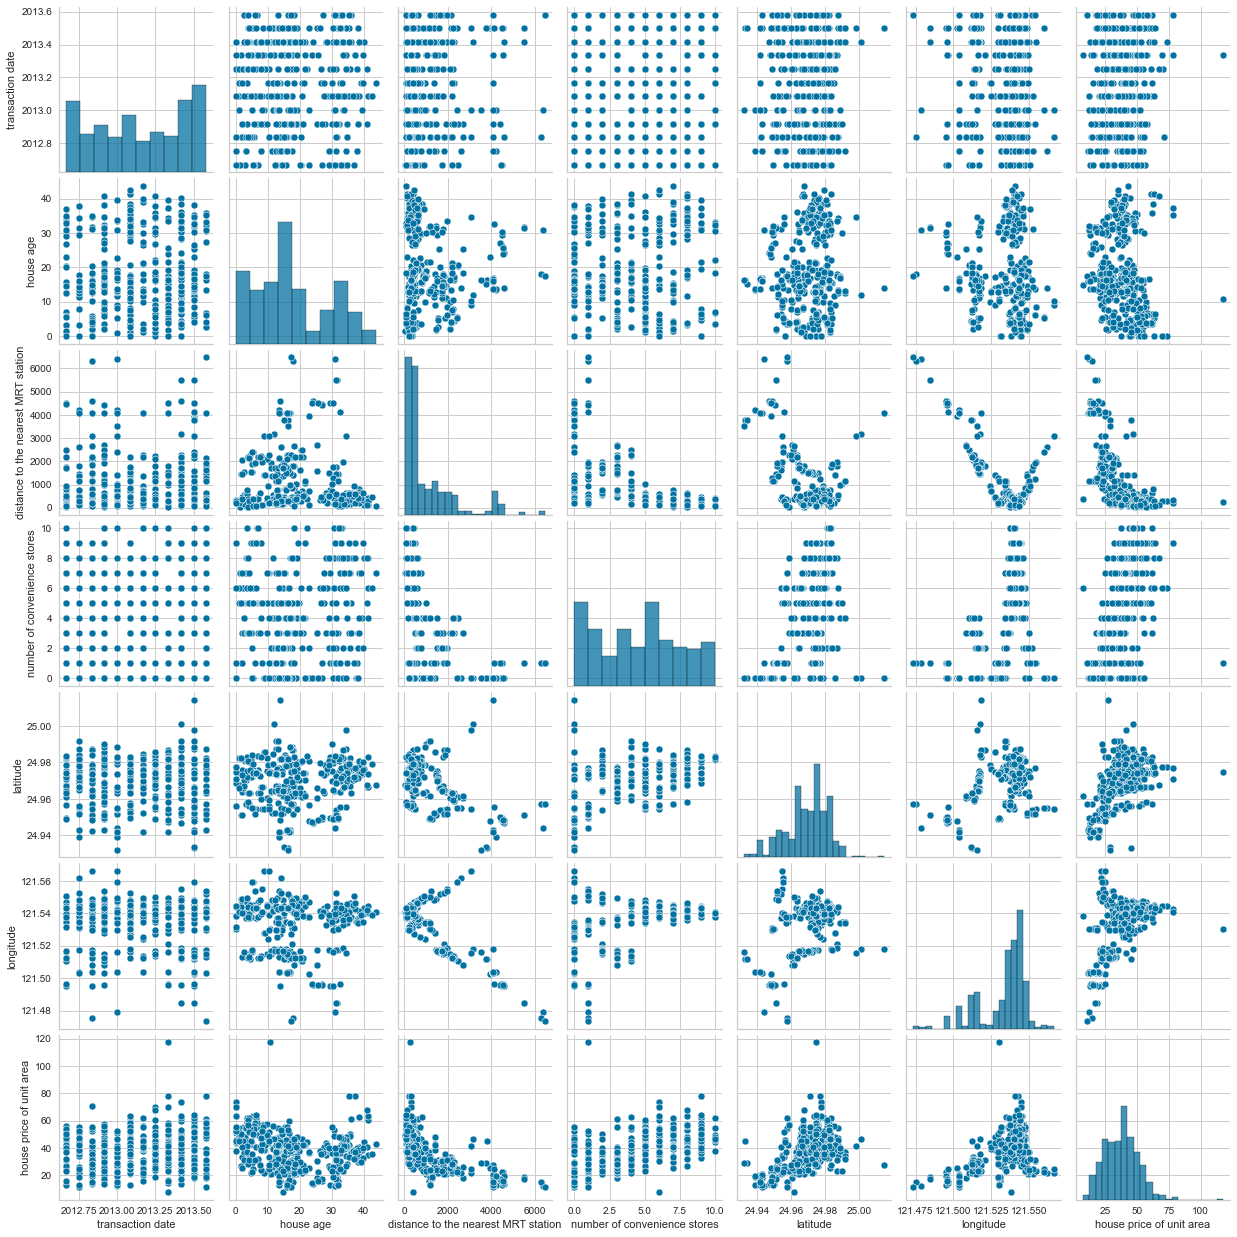

In [9]:
sns.pairplot(df)

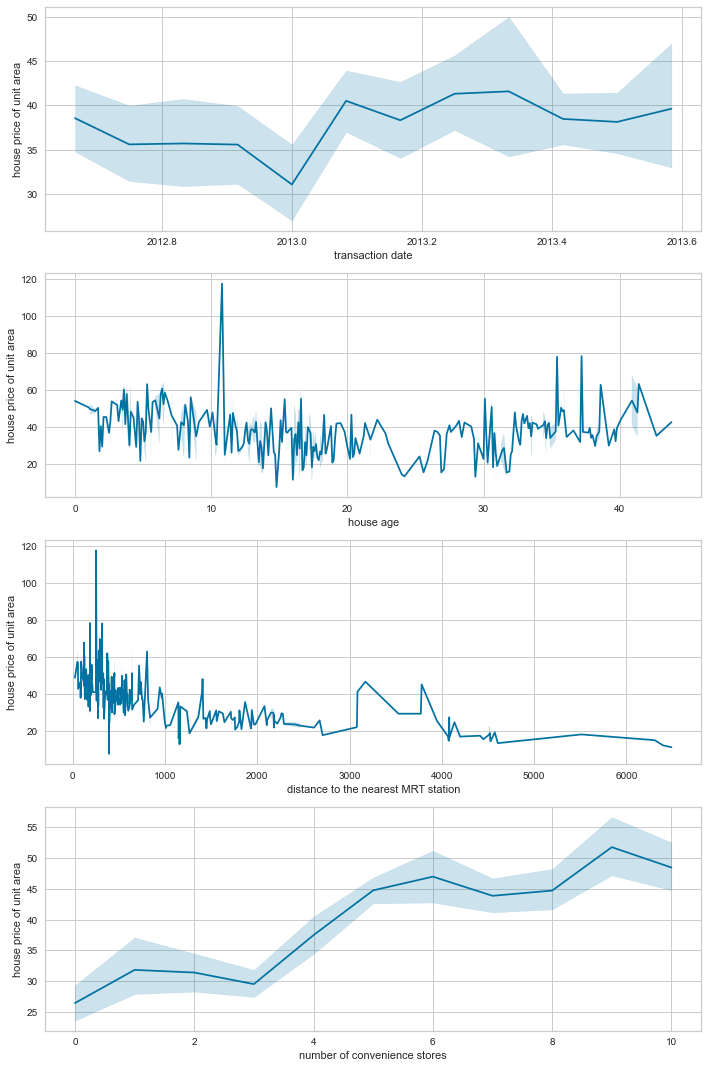

In [10]:
X_feature = ['transaction date','house age','distance to the nearest MRT station','number of convenience stores']
X_index = list(range(len(X_feature)))
fig, ax = plt.subplots(4,1,figsize=(10,15))
for i in X_index:
    sns.lineplot(data=df, x = X_feature[i], y = 'house price of unit area', ax=ax[i])
    plt.tight_layout()

In [11]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,geometry
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,POINT (121.54024 24.98298)
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,POINT (121.53951 24.98034)
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,POINT (121.54391 24.98746)
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,POINT (121.54391 24.98746)
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,POINT (121.54245 24.97937)


In [12]:
gdf[gdf['latitude']<24.96]

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,geometry
8,2013.500000,31.7,5512.0380,1,24.95095,121.48458,18.8,POINT (121.48458 24.95095)
22,2012.916667,14.7,1360.1390,1,24.95204,121.54842,24.6,POINT (121.54842 24.95204)
27,2013.250000,10.4,276.4490,5,24.95593,121.53913,33.6,POINT (121.53913 24.95593)
30,2013.500000,25.9,4519.6900,0,24.94826,121.49587,22.1,POINT (121.49587 24.94826)
37,2013.166667,12.0,1360.1390,1,24.95204,121.54842,25.3,POINT (121.54842 24.95204)
...,...,...,...,...,...,...,...,...
391,2013.583333,6.2,1939.7490,1,24.95155,121.55387,31.3,POINT (121.55387 24.95155)
394,2013.500000,32.6,4136.2710,1,24.95544,121.49630,24.7,POINT (121.49630 24.95544)
405,2012.666667,23.0,130.9945,6,24.95663,121.53765,37.2,POINT (121.53765 24.95663)
407,2013.000000,5.2,2408.9930,0,24.95505,121.55964,22.3,POINT (121.55964 24.95505)


<AxesSubplot:>

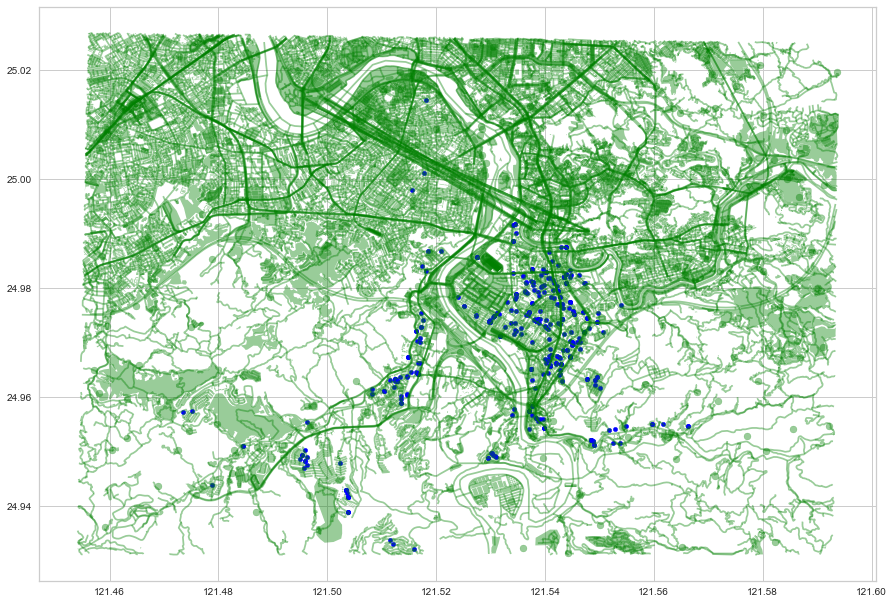

In [13]:
taipei1 = gpd.read_file('planet\shape\\buildings.shp')
taipei2 = gpd.read_file('planet\shape\\landuse.shp')
taipei3 = gpd.read_file('planet\shape\\natural.shp')
taipei4 = gpd.read_file('planet\shape\\places.shp')
taipei6 = gpd.read_file('planet\shape\\railways.shp')
taipei7 = gpd.read_file('planet\shape\\roads.shp')
taipei8 = gpd.read_file('planet\shape\\waterways.shp')
taipei = gpd.GeoDataFrame(pd.concat([taipei1, taipei2, taipei3, taipei4, taipei6, taipei7, taipei8]))
#print(list(taipei))
#print(type(taipei))
#taipei
fig,ax=plt.subplots(figsize=(15,15))
taipei.plot(ax=ax,alpha=0.4,color='green')
gdf.plot(ax=ax,markersize=20,color='blue',marker='o')

Based on the visualization above, I found that:
1. From the geospatial map, we know that majority of house recorded in the data base is located in populated district. But there were quite number of house that located in the non populated district. Houses located in non populated district has `house price per unit area` that were cheaper than Houses located in populated district
2. The higher the number of convinience store means the higher the house price
3. In general, the closer distance between MRT station and houses means increase house price
4. In general, there were no spesific pattern that indicate correlation between house price and house age. But the visualization shows there were certain tendencies that consumer aftering house that age approx 10-15 years old. The reason is there were spike increase in house price that had age around 10-15 years old
5. In general, there were certain increase in houses price overtime. It is suspected that the reason why this happened is that there was an increase in inflation

# Split the data into Train and Test

In [14]:
train,test = train_test_split(gdf, test_size=0.20, random_state=42)

In [15]:
train.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 331 entries, 192 to 102
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction date                     331 non-null    float64 
 1   house age                            331 non-null    float64 
 2   distance to the nearest MRT station  331 non-null    float64 
 3   number of convenience stores         331 non-null    int64   
 4   latitude                             331 non-null    float64 
 5   longitude                            331 non-null    float64 
 6   house price of unit area             331 non-null    float64 
 7   geometry                             331 non-null    geometry
dtypes: float64(6), geometry(1), int64(1)
memory usage: 23.3 KB


In [16]:
test.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 83 entries, 358 to 208
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   transaction date                     83 non-null     float64 
 1   house age                            83 non-null     float64 
 2   distance to the nearest MRT station  83 non-null     float64 
 3   number of convenience stores         83 non-null     int64   
 4   latitude                             83 non-null     float64 
 5   longitude                            83 non-null     float64 
 6   house price of unit area             83 non-null     float64 
 7   geometry                             83 non-null     geometry
dtypes: float64(6), geometry(1), int64(1)
memory usage: 5.8 KB


In this step i will split the data into train and test dataset. 20% data will be store in test data, consequently 80% data will be store in train data

# Feature Engineering
this section will be split into few step:
1. Cleaning null and duplicated data
2. Delete Latitude and Longitude
3. Label Encoder for Geometry Data
4. Handling Outlier Data
5. Handling multicollinearity
6. Scale the data
7. Splitting data into X and Y and training into training and validation

## Cleaning null and duplicated data

In [17]:
data = {'train':train,'test':test}
for key, value in data.items():
    print(f'Total Null value in {key} data is')
    print('----------------------------------------')
    print(f'{value.isnull().sum()}')
    print(f'Total Duplicate value in {key} data is {value.duplicated().sum()}')
    print('----------------------------------------')

Total Null value in train data is
----------------------------------------
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
geometry                               0
dtype: int64
Total Duplicate value in train data is 0
----------------------------------------
Total Null value in test data is
----------------------------------------
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
geometry                               0
dtype: int64
Total Duplicate value in test data is 0
----------------------------------------


Because there weren't data that had null value and duplicated value, I can continue to the next step

## Delete Latitude and Longitude Feature
The reason that i need to delete these 2 column is because the data already being represent in `geometry` feature

In [18]:
train = train.drop(['latitude','longitude'], axis=1)
test = test.drop(['latitude','longitude'], axis=1)

In [19]:
train

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,house price of unit area,geometry
192,2013.166667,43.8,57.58945,7,42.7,POINT (121.54069 24.96750)
234,2013.250000,8.0,2216.61200,4,23.9,POINT (121.51361 24.96007)
5,2012.666667,7.1,2175.03000,3,32.1,POINT (121.51254 24.96305)
45,2013.083333,36.6,488.81930,8,38.3,POINT (121.54494 24.97015)
245,2013.416667,7.5,639.61980,5,40.8,POINT (121.54814 24.97258)
...,...,...,...,...,...,...
71,2013.083333,35.5,640.73910,3,40.8,POINT (121.53715 24.97563)
106,2013.083333,17.2,189.51810,8,47.1,POINT (121.54308 24.97707)
270,2013.333333,10.8,252.58220,1,117.5,POINT (121.53046 24.97460)
348,2012.833333,4.6,259.66070,6,53.7,POINT (121.54516 24.97585)


## Label Encoder for Geospatial Data
from the train and test information, I know that geometry store geometry data type.

In [20]:
train['geometry'] = train['geometry'].astype('str')
train['geometry'] = train['geometry'].astype('category').cat.codes
test['geometry'] = test['geometry'].astype('str')
test['geometry'] = test['geometry'].astype('category').cat.codes

C:\Users\LENOVO\anaconda3\lib\site-packages\geopandas\geodataframe.py:1471: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [21]:
train

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,house price of unit area,geometry
192,2013.166667,43.8,57.58945,7,42.7,136
234,2013.250000,8.0,2216.61200,4,23.9,29
5,2012.666667,7.1,2175.03000,3,32.1,24
45,2013.083333,36.6,488.81930,8,38.3,186
245,2013.416667,7.5,639.61980,5,40.8,201
...,...,...,...,...,...,...
71,2013.083333,35.5,640.73910,3,40.8,99
106,2013.083333,17.2,189.51810,8,47.1,166
270,2013.333333,10.8,252.58220,1,117.5,66
348,2012.833333,4.6,259.66070,6,53.7,188


## Handling Outlier Data

Because above we already identified that there were outlier in `distance to the nearest MRT station`,`latitude`,`longitude`, and `house price of unit area`. We will check how much data that categorized as outlier

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

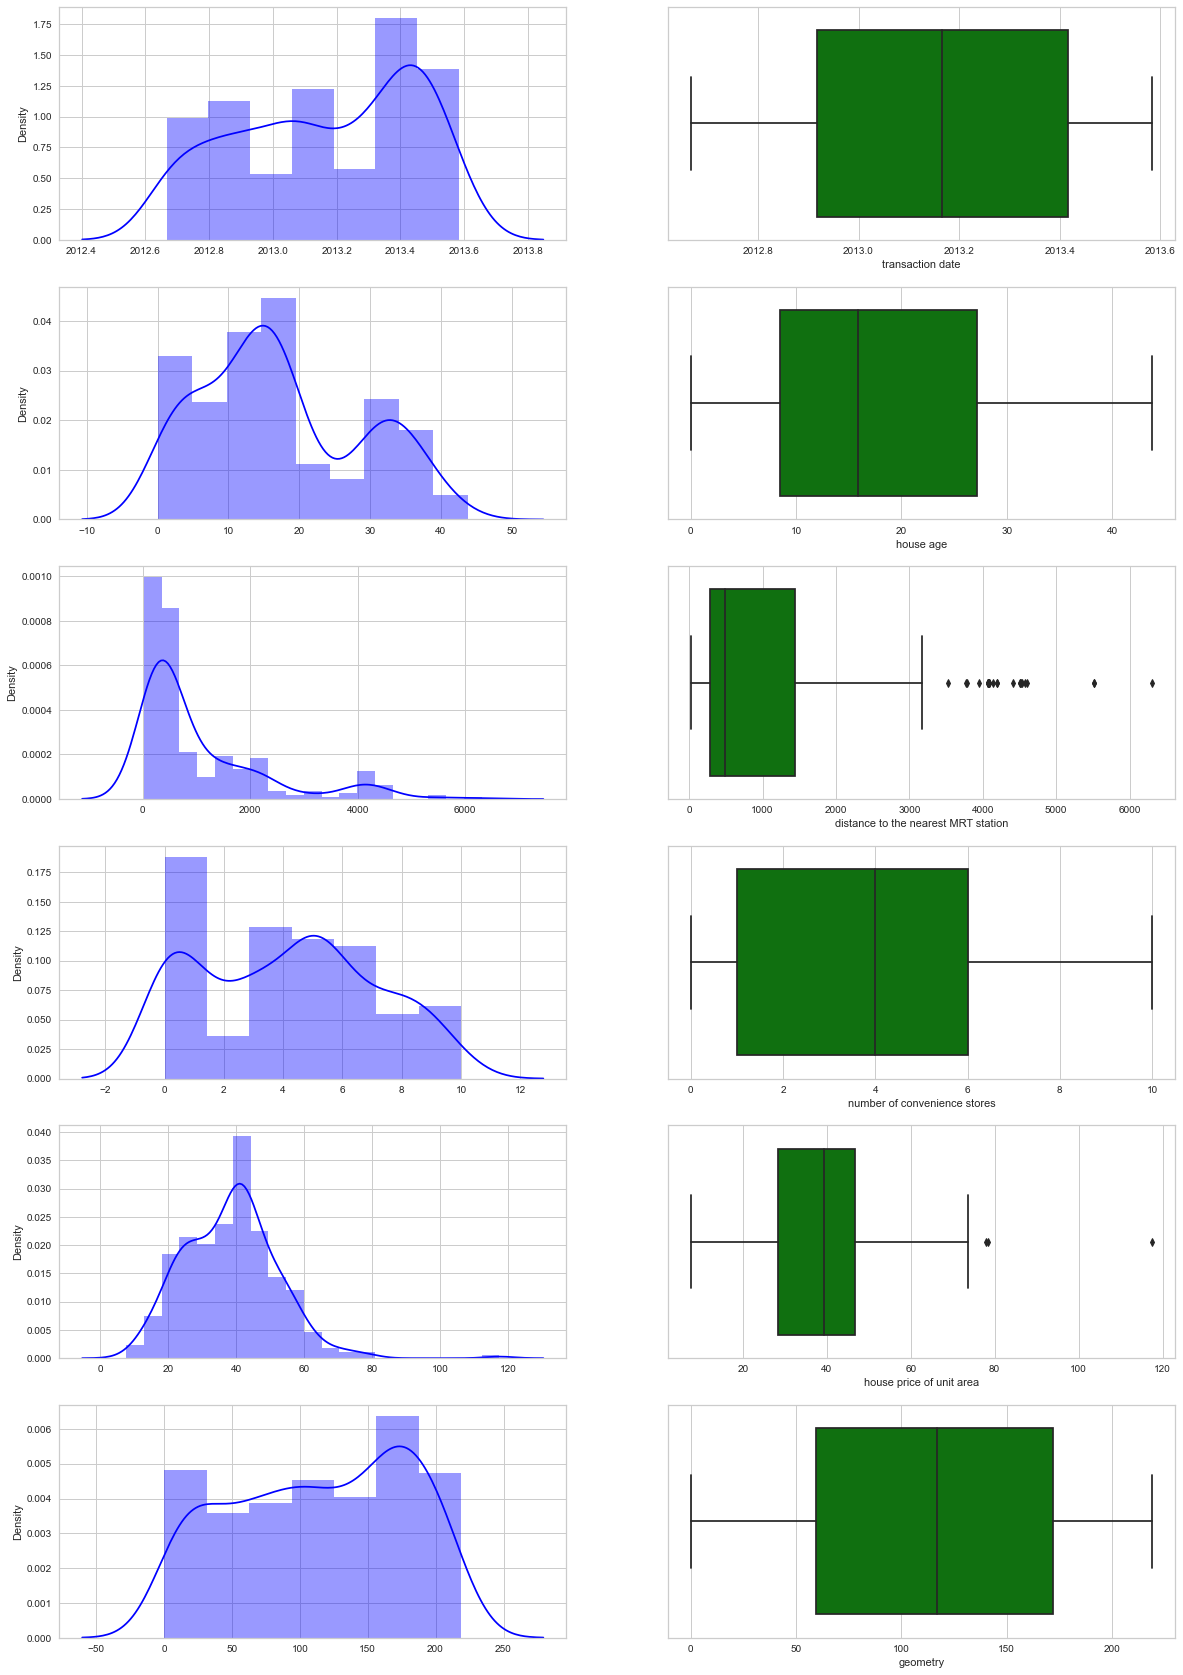

In [22]:
features = list(train.columns)
fig, ax = plt.subplots(len(features),2,figsize=(20,30))
for idx, column in enumerate(features):
    sns.distplot(
        x=train[column], 
        color='blue', 
        ax=ax[idx][0])
    sns.boxplot(
        x=train[column],
        color='green',
        ax=ax[idx][1]
        )

In [23]:
from numpy import mean
from numpy import std

cols_with_outlier = ['distance to the nearest MRT station','geometry','house price of unit area']

data = {'train':train,'test':test}

for key,value in data.items():
    print(f'{key} data')
    for j in cols_with_outlier:
        data_mean, data_std = mean(value[j]), std(value[j])
        cut_off = data_std * 1.5
        lower, upper = data_mean - cut_off, data_mean + cut_off
        outliers = [x for x in value[j] if x < lower or x > upper]
        print("Outlier in", j, "=" + ' %d' % len(outliers))
    print('------------------------------------------------------')

train data
Outlier in distance to the nearest MRT station = 32
Outlier in geometry = 41
Outlier in house price of unit area = 35
------------------------------------------------------
test data
Outlier in distance to the nearest MRT station = 9
Outlier in geometry = 7
Outlier in house price of unit area = 14
------------------------------------------------------


Because we discover that there were max 3 data that outlier in each feature and the total data is less than 1000. I decided to simply ignore the outlier in the dataset (not to drop it). But i will transform the data using log transformation in order to minimize the number of outlier data

In [24]:
data = [train,test]
for j in data:
    column = list(j.columns)
    for i in column:
        j[i] = np.log(j[i]+1)

C:\Users\LENOVO\anaconda3\lib\site-packages\geopandas\geodataframe.py:1471: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

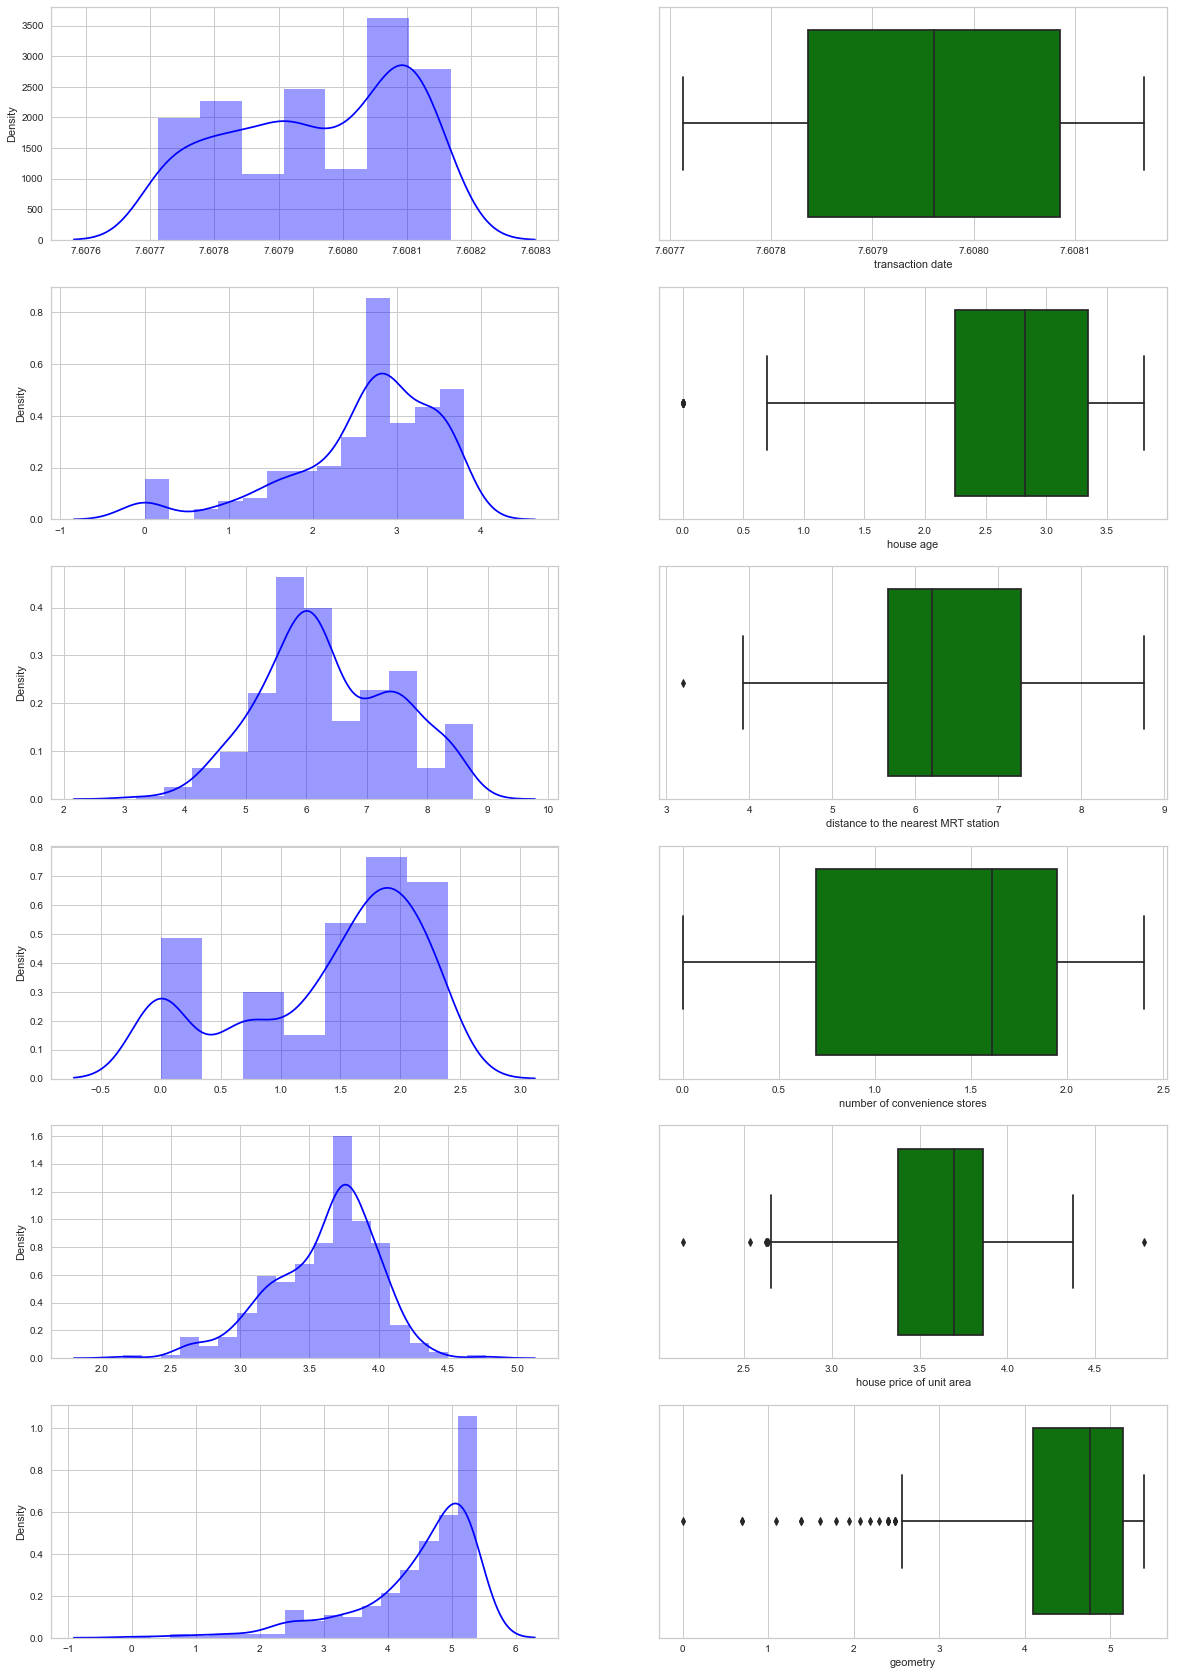

In [25]:
features = list(train.columns)
fig, ax = plt.subplots(len(features),2,figsize=(20,30))
for idx, column in enumerate(features):
    sns.distplot(
        x=train[column], 
        color='blue', 
        ax=ax[idx][0])
    sns.boxplot(
        x=train[column],
        color='green',
        ax=ax[idx][1]
        )

## Multicollinearity Handling

<AxesSubplot:>

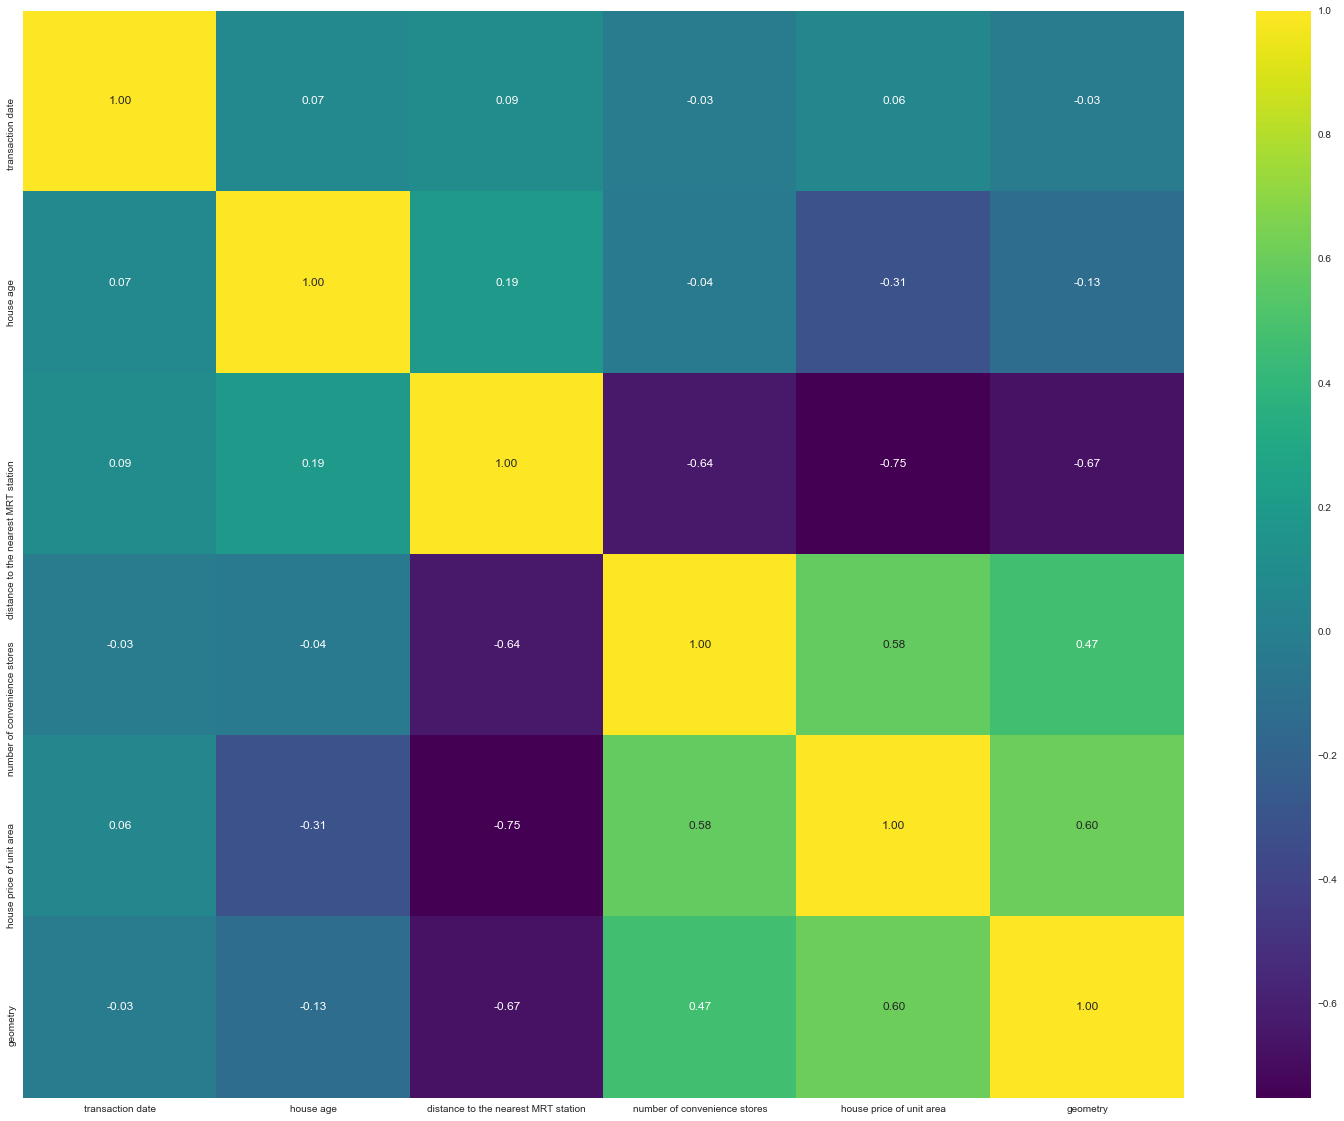

In [26]:
corr_= train.corr()
plt.figure(figsize=(26,20))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "viridis")

Using pearson correlation to check whereas feature had high correlation with each other, it seems that there were 0 feature that had high correlation. But noted that:
* `distance in the nearest MRT station` had high negative correlation with `house price of unit area`
* `number of convinience store`,`latitude`,`longitude` had high positive correlation with `house price of unit area`

## Scale the Data
As we know above that the data had skewed distribution, so in order for me to be able to scale the data correctly, I will need to used `MinMaxScaler`

In [27]:
scaler = MinMaxScaler()
data = [train,test]
for j in data:
    scaler.fit(j)
    j = scaler.transform(j)

In [28]:
train = pd.DataFrame(train, columns=train.columns)
train

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,house price of unit area,geometry
192,7.607961,3.802208,4.070555,2.079442,3.777348,4.919981
234,7.608002,2.197225,7.704186,1.609438,3.214868,3.401197
5,7.607713,2.091864,7.685257,1.386294,3.499533,3.218876
45,7.607919,3.627004,6.194037,2.197225,3.671225,5.231109
245,7.608085,2.140066,6.462436,1.791759,3.732896,5.308268
...,...,...,...,...,...,...
71,7.607919,3.597312,6.464182,1.386294,3.732896,4.605170
106,7.607919,2.901422,5.249747,2.197225,3.873282,5.117994
270,7.608044,2.468100,5.535688,0.693147,4.774913,4.204693
348,7.607795,1.722767,5.563220,1.945910,4.001864,5.241747


## Split the data into train, test, validation, and also split target variable from the dataset

In [29]:
X_train = train.drop('house price of unit area',axis=1)
X_test = test.drop('house price of unit area',axis=1)
y_train = train['house price of unit area']
y_test = test['house price of unit area']

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Modelling
In this section I will apply machine learning modelling to the data. To be able predict `house price of unit area`, I will use 4 different regression model method. Below mention regression model method that will being used in this project:
1. Linear Regression
2. L1 Regularization (Lasso Regression)
3. L2 Regularization (Ridge Regression)
4. Elastic Net
5. XGB Regression
6. Random Forest Regression

I will compare each model regression evaluation metric (RMSE,MAE,R-Squared,MSE) to found which model is the best one to interpret the data.
<br><br>
After that, i will optimized it's parameter using Grid-Search. (The reason that i do Grid-Search only to the best model is to shorten the processing time)

## Linear Regression

In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [32]:
pred_train_linear = linear_model.predict(X_train)

mae_train_linear = mean_absolute_error(y_train, pred_train_linear)
mse_train_linear = mean_squared_error(y_train, pred_train_linear)
r2_train_linear = r2_score(y_train, pred_train_linear)
rmse_train_linear = np.sqrt(mse_train_linear)

In [33]:
pred_val_linear = linear_model.predict(X_val)

mae_val_linear = mean_absolute_error(y_val, pred_val_linear)
mse_val_linear = mean_squared_error(y_val, pred_val_linear)
r2_val_linear = r2_score(y_val, pred_val_linear)
rmse_val_linear = np.sqrt(mse_val_linear)

In [34]:
pred_test_linear = linear_model.predict(X_test)

mae_test_linear = mean_absolute_error(y_test, pred_test_linear)
mse_test_linear = mean_squared_error(y_test, pred_test_linear)
r2_test_linear = r2_score(y_test, pred_test_linear)
rmse_test_linear = np.sqrt(mse_test_linear)

In [35]:
linear = pd.DataFrame(np.array([[mae_train_linear,mse_train_linear,r2_train_linear,rmse_train_linear],
                               [mae_val_linear,mse_val_linear,r2_val_linear,rmse_val_linear],
                               [mae_test_linear,mse_test_linear,r2_test_linear,rmse_test_linear]]),
                     columns=['Mean Absolute Error','Mean Square Error','R-Squared','Root Mean Square Error'],
                     index =['train data','validation data','test data'])
linear

,Mean Absolute Error,Mean Square Error,R-Squared,Root Mean Square Error
train data,0.159813,0.051769,0.632124,0.227528
validation data,0.154978,0.043459,0.684973,0.208467
test data,0.154725,0.041882,0.727028,0.204652


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


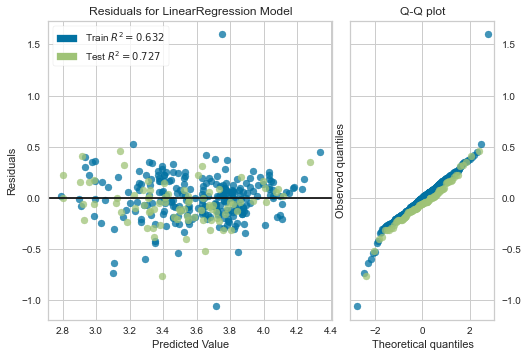

In [36]:
linear_visualize = ResidualsPlot(linear_model,hist=False,qqplot=True)
linear_visualize.fit(X_train, y_train)
linear_visualize.score(X_test, y_test)
linear_visualize.show();

## L1 Regularizor (Lasso Regression)

In [37]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [38]:
pred_train_lasso = lasso_model.predict(X_train)

mae_train_lasso = mean_absolute_error(y_train, pred_train_lasso)
mse_train_lasso = mean_squared_error(y_train, pred_train_lasso)
r2_train_lasso = r2_score(y_train, pred_train_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)

In [39]:
pred_val_lasso = lasso_model.predict(X_val)

mae_val_lasso = mean_absolute_error(y_val, pred_val_lasso)
mse_val_lasso = mean_squared_error(y_val, pred_val_lasso)
r2_val_lasso = r2_score(y_val, pred_val_lasso)
rmse_val_lasso = np.sqrt(mse_val_lasso)

In [40]:
pred_test_lasso = lasso_model.predict(X_test)

mae_test_lasso = mean_absolute_error(y_test, pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test, pred_test_lasso)
r2_test_lasso = r2_score(y_test, pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)

In [41]:
lasso = pd.DataFrame(np.array([[mae_train_lasso,mse_train_lasso,r2_train_lasso,rmse_train_lasso],
                               [mae_val_lasso,mse_val_lasso,r2_val_lasso,rmse_val_lasso],
                               [mae_test_lasso,mse_test_lasso,r2_test_lasso,rmse_test_lasso]]),
                     columns=['Mean Absolute Error','Mean Square Error','R-Squared','Root Mean Square Error'],
                     index =['train data','validation data','test data'])
lasso

,Mean Absolute Error,Mean Square Error,R-Squared,Root Mean Square Error
train data,0.198169,0.073335,0.478878,0.270804
validation data,0.182669,0.062061,0.550128,0.249120
test data,0.197873,0.070085,0.543216,0.264736


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


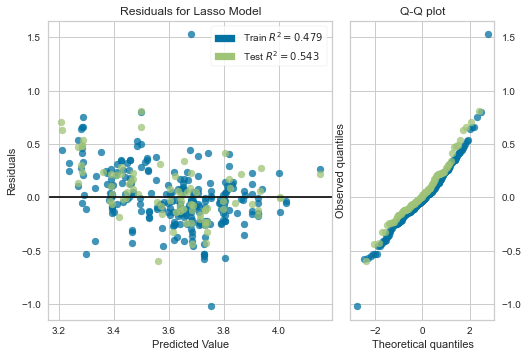

In [42]:
lasso_visualize = ResidualsPlot(lasso_model,hist=False,qqplot=True)
lasso_visualize.fit(X_train, y_train)
lasso_visualize.score(X_test, y_test)
lasso_visualize.show();

## L2 Regularizor (Ridge Regression)

In [43]:
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [44]:
pred_train_ridge = ridge_model.predict(X_train)

mae_train_ridge = mean_absolute_error(y_train, pred_train_ridge)
mse_train_ridge = mean_squared_error(y_train, pred_train_ridge)
r2_train_ridge = r2_score(y_train, pred_train_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)

In [45]:
pred_val_ridge = ridge_model.predict(X_val)

mae_val_ridge = mean_absolute_error(y_val, pred_val_ridge)
mse_val_ridge = mean_squared_error(y_val, pred_val_ridge)
r2_val_ridge = r2_score(y_val, pred_val_ridge)
rmse_val_ridge = np.sqrt(mse_val_ridge)

In [46]:
pred_test_ridge = ridge_model.predict(X_test)

mae_test_ridge = mean_absolute_error(y_test, pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, pred_test_ridge)
r2_test_ridge = r2_score(y_test, pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

In [47]:
ridge = pd.DataFrame(np.array([[mae_train_ridge,mse_train_ridge,r2_train_ridge,rmse_train_ridge],
                               [mae_val_ridge,mse_val_ridge,r2_val_ridge,rmse_val_ridge],
                               [mae_test_ridge,mse_test_ridge,r2_test_ridge,rmse_test_ridge]]),
                     columns=['Mean Absolute Error','Mean Square Error','R-Squared','Root Mean Square Error'],
                     index =['train data','validation data','test data'])
ridge

,Mean Absolute Error,Mean Square Error,R-Squared,Root Mean Square Error
train data,0.161660,0.053960,0.616557,0.232293
validation data,0.153359,0.045941,0.666978,0.214339
test data,0.160286,0.044211,0.711850,0.210265


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


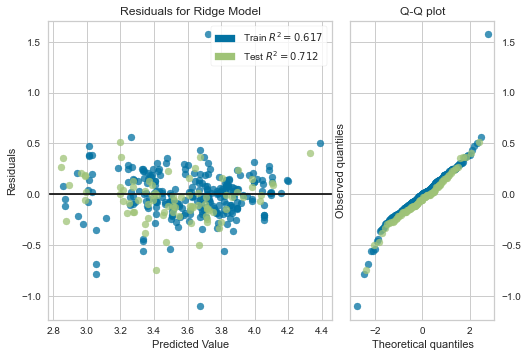

In [48]:
ridge_visualize = ResidualsPlot(ridge_model,hist=False,qqplot=True)
ridge_visualize.fit(X_train, y_train)
ridge_visualize.score(X_test, y_test)
ridge_visualize.show();

## Elastic Net

In [49]:
EN_model = ElasticNet(alpha=0.1)
EN_model.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [50]:
pred_train_EN = EN_model.predict(X_train)

mae_train_EN = mean_absolute_error(y_train, pred_train_EN)
mse_train_EN = mean_squared_error(y_train, pred_train_EN)
r2_train_EN = r2_score(y_train, pred_train_EN)
rmse_train_EN = np.sqrt(mse_train_EN)

In [51]:
pred_val_EN = EN_model.predict(X_val)

mae_val_EN = mean_absolute_error(y_val, pred_val_EN)
mse_val_EN = mean_squared_error(y_val, pred_val_EN)
r2_val_EN = r2_score(y_val, pred_val_EN)
rmse_val_EN = np.sqrt(mse_val_EN)

In [52]:
pred_test_EN = EN_model.predict(X_test)

mae_test_EN = mean_absolute_error(y_test, pred_test_EN)
mse_test_EN = mean_squared_error(y_test, pred_test_EN)
r2_test_EN = r2_score(y_test, pred_test_EN)
rmse_test_EN = np.sqrt(mse_test_EN)

In [53]:
ElasticNet = pd.DataFrame(np.array([[mae_train_EN,mse_train_EN,r2_train_EN,rmse_train_EN],
                               [mae_val_EN,mse_val_EN,r2_val_EN,rmse_val_EN],
                               [mae_test_EN,mse_test_EN,r2_test_EN,rmse_test_EN]]),
                     columns=['Mean Absolute Error','Mean Square Error','R-Squared','Root Mean Square Error'],
                     index =['train data','validation data','test data'])
ElasticNet

,Mean Absolute Error,Mean Square Error,R-Squared,Root Mean Square Error
train data,0.178819,0.062124,0.558545,0.249246
validation data,0.162672,0.050757,0.632065,0.225294
test data,0.176282,0.055051,0.641202,0.234629


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


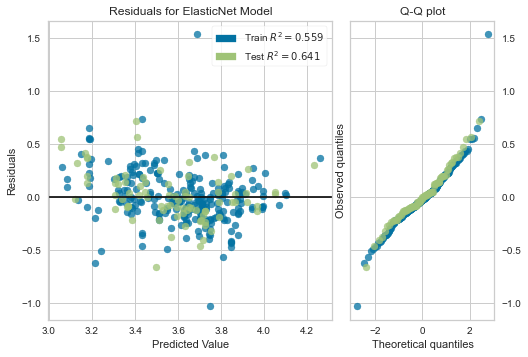

In [54]:
EN_visualize = ResidualsPlot(EN_model,hist=False,qqplot=True)
EN_visualize.fit(X_train, y_train)
EN_visualize.score(X_test, y_test)
EN_visualize.show();

## XGB Regression

In [55]:
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [56]:
pred_train_xgb = xgb_model.predict(X_train)

mae_train_xgb = mean_absolute_error(y_train, pred_train_xgb)
mse_train_xgb = mean_squared_error(y_train, pred_train_xgb)
r2_train_xgb = r2_score(y_train, pred_train_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)

In [57]:
pred_val_xgb = xgb_model.predict(X_val)

mae_val_xgb = mean_absolute_error(y_val, pred_val_xgb)
mse_val_xgb = mean_squared_error(y_val, pred_val_xgb)
r2_val_xgb = r2_score(y_val, pred_val_xgb)
rmse_val_xgb = np.sqrt(mse_val_xgb)

In [58]:
pred_test_xgb = xgb_model.predict(X_test)

mae_test_xgb = mean_absolute_error(y_test, pred_test_xgb)
mse_test_xgb = mean_squared_error(y_test, pred_test_xgb)
r2_test_xgb = r2_score(y_test, pred_test_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)

In [59]:
XGB = pd.DataFrame(np.array([[mae_train_xgb,mse_train_xgb,r2_train_xgb,rmse_train_xgb],
                               [mae_val_xgb,mse_val_xgb,r2_val_xgb,rmse_val_xgb],
                               [mae_test_xgb,mse_test_xgb,r2_test_xgb,rmse_test_xgb]]),
                     columns=['Mean Absolute Error','Mean Square Error','R-Squared','Root Mean Square Error'],
                     index =['train data','validation data','test data'])
XGB

,Mean Absolute Error,Mean Square Error,R-Squared,Root Mean Square Error
train data,0.005307,0.000465,0.996692,0.021575
validation data,0.148504,0.041725,0.697540,0.204267
test data,0.179814,0.057631,0.624383,0.240065


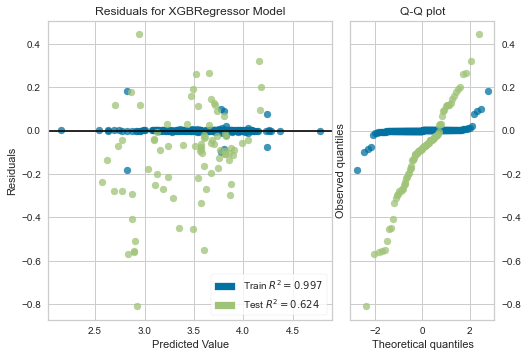

In [60]:
xgb_visualize = ResidualsPlot(xgb_model,hist=False,qqplot=True)
xgb_visualize.fit(X_train, y_train)
xgb_visualize.score(X_test, y_test)
xgb_visualize.show();

## Random Forest Regression

In [61]:
rf_model = RandomForestRegressor(random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [62]:
pred_train_rf = rf_model.predict(X_train)

mae_train_rf = mean_absolute_error(y_train, pred_train_rf)
mse_train_rf = mean_squared_error(y_train, pred_train_rf)
r2_train_rf = r2_score(y_train, pred_train_rf)
rmse_train_rf = np.sqrt(mse_train_rf)

In [63]:
pred_val_rf = rf_model.predict(X_val)

mae_val_rf = mean_absolute_error(y_val, pred_val_rf)
mse_val_rf = mean_squared_error(y_val, pred_val_rf)
r2_val_rf = r2_score(y_val, pred_val_rf)
rmse_val_rf = np.sqrt(mse_val_rf)

In [64]:
pred_test_rf = rf_model.predict(X_test)

mae_test_rf = mean_absolute_error(y_test, pred_test_rf)
mse_test_rf = mean_squared_error(y_test, pred_test_rf)
r2_test_rf = r2_score(y_test, pred_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

In [65]:
RandomForest = pd.DataFrame(np.array([[mae_train_rf,mse_train_rf,r2_train_rf,rmse_train_rf],
                               [mae_val_rf,mse_val_rf,r2_val_rf,rmse_val_rf],
                               [mae_test_rf,mse_test_rf,r2_test_rf,rmse_test_rf]]),
                     columns=['Mean Absolute Error','Mean Square Error','R-Squared','Root Mean Square Error'],
                     index =['train data','validation data','test data'])
RandomForest

,Mean Absolute Error,Mean Square Error,R-Squared,Root Mean Square Error
train data,0.052027,0.005747,0.959158,0.075812
validation data,0.134407,0.031960,0.768329,0.178772
test data,0.178967,0.047686,0.689201,0.218372


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


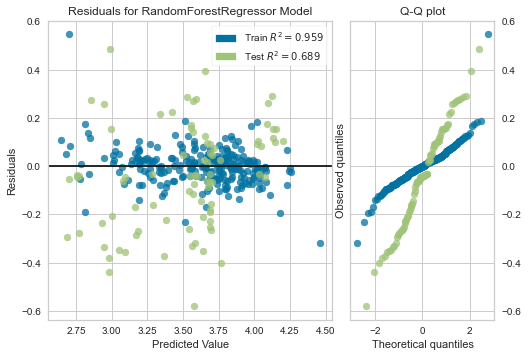

In [66]:
rf_visualize = ResidualsPlot(rf_model,hist=False,qqplot=True)
rf_visualize.fit(X_train, y_train)
rf_visualize.score(X_test, y_test)
rf_visualize.show();

## Evaluation

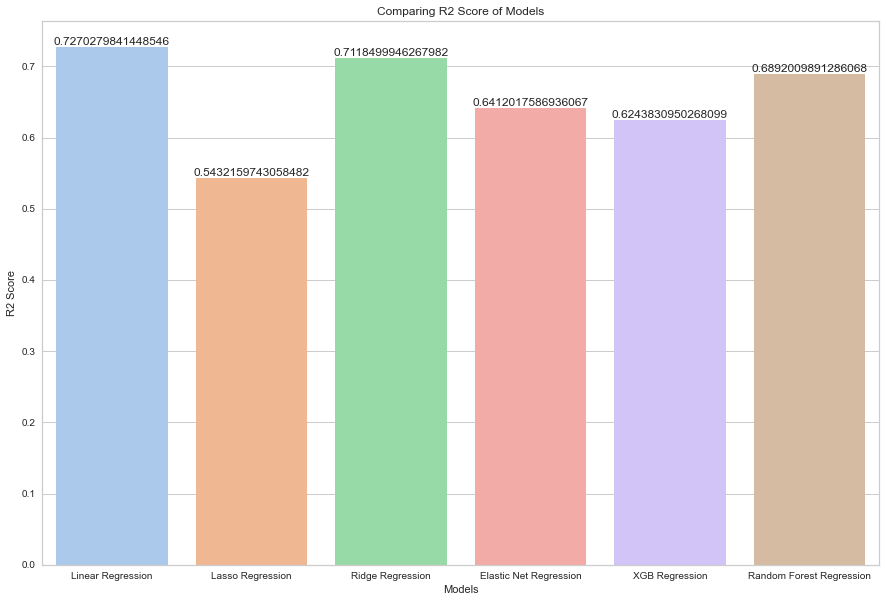

In [67]:
fig, ax = plt.subplots(figsize=(15,10))

models = ['Linear Regression','Lasso Regression','Ridge Regression','Elastic Net Regression', 'XGB Regression', 'Random Forest Regression']
r2 = [r2_test_linear, r2_test_lasso, r2_test_ridge,r2_test_EN, r2_test_xgb, r2_test_rf]
sns.barplot(x = models, y = r2, palette='pastel')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparing R2 Score of Models')

labels = r2

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

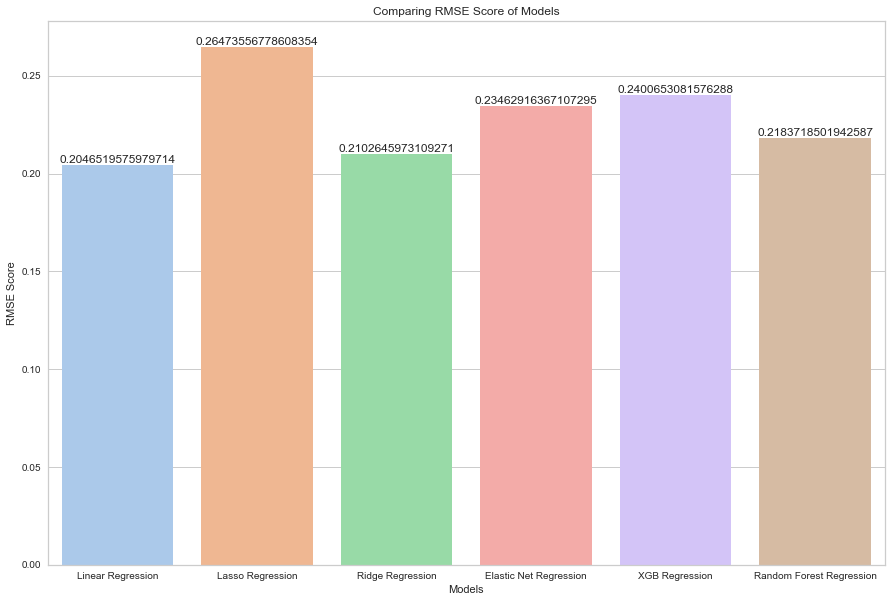

In [68]:
fig, ax = plt.subplots(figsize=(15,10))
models = ['Linear Regression','Lasso Regression','Ridge Regression','Elastic Net Regression', 'XGB Regression', 'Random Forest Regression']
r2 = [rmse_test_linear, rmse_test_lasso, rmse_test_ridge,rmse_test_EN, rmse_test_xgb, rmse_test_rf]
sns.barplot(x = models, y = r2, palette='pastel', ax=ax)
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.title('Comparing RMSE Score of Models')

labels = r2

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

By comparing R-Squared and RMSE score on each section, We can conclude that the best model used to predict `house price of unit area` is `Linear Regression`, `Ridge Regression`, and `Random Forest Regression. 

## Cross Validation Using The Best Model
In this section, I will try to find best parameter in `Random Forest Regression` and `Ridge Regression`. I will only optimize this two model because `Linear Regression` only have little parameter that can be optimize

### Random Forest

In [69]:
%%time
import warnings
warnings.filterwarnings('ignore')
# using random search CV
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators': (10,20,30,40,50,60,70,80,90,100),
    'max_depth':(1,2,3,4,5,6,7,8,9,10),
    'bootstrap': [True, False],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_randomcv = RandomizedSearchCV(rf_model, parameters, cv=5, 
                                     scoring='neg_root_mean_squared_error', n_iter=100)
rf_model_randomcv.fit(X_train, y_train)

Wall time: 47.1 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': (10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100)},
                   scoring='neg_root_mean_squared_error')

In [70]:
cv_result = pd.DataFrame(rf_model_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
99,0.022400,0.003201,0.003200,0.003919,10,2,1,9,True,"{'n_estimators': 10, 'min_samples_split': 2, '...",-0.294541,-0.202485,-0.159286,-0.152674,-0.175759,-0.196949,0.051735,1
28,0.029062,0.009586,0.009443,0.005829,20,5,1,8,True,"{'n_estimators': 20, 'min_samples_split': 5, '...",-0.297202,-0.198534,-0.159340,-0.158480,-0.173984,-0.197508,0.051910,2
18,0.079997,0.008757,0.007998,0.005059,40,5,1,9,True,"{'n_estimators': 40, 'min_samples_split': 5, '...",-0.288725,-0.212002,-0.161107,-0.159769,-0.166944,-0.197709,0.049425,3
73,0.122030,0.008617,0.006325,0.005867,80,2,1,10,True,"{'n_estimators': 80, 'min_samples_split': 2, '...",-0.287958,-0.213869,-0.154657,-0.159966,-0.173820,-0.198054,0.049506,4
0,0.118250,0.009163,0.015689,0.000155,90,5,1,10,True,"{'n_estimators': 90, 'min_samples_split': 5, '...",-0.289029,-0.215873,-0.157231,-0.158596,-0.169695,-0.198085,0.050243,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.088224,0.013126,0.008099,0.000222,60,10,1,1,True,"{'n_estimators': 60, 'min_samples_split': 10, ...",-0.360762,-0.272527,-0.166534,-0.255371,-0.230960,-0.257231,0.063043,92
67,0.047169,0.005309,0.007862,0.006993,40,5,4,1,True,"{'n_estimators': 40, 'min_samples_split': 5, '...",-0.361211,-0.271410,-0.167057,-0.255475,-0.232376,-0.257506,0.062872,97
15,0.036367,0.006564,0.004708,0.006250,30,10,2,1,True,"{'n_estimators': 30, 'min_samples_split': 10, ...",-0.360753,-0.271269,-0.167024,-0.256191,-0.234792,-0.258006,0.062534,98
57,0.085402,0.023737,0.011125,0.006345,60,2,4,1,False,"{'n_estimators': 60, 'min_samples_split': 2, '...",-0.362733,-0.274301,-0.165709,-0.263383,-0.240796,-0.261384,0.063277,99


In [71]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [72]:
rf_model_randomcv.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 9,
 'bootstrap': True}

In [73]:
rf_model_tuned = RandomForestRegressor(random_state = 0, n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1, max_depth = 7, bootstrap = True)
rf_model_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=0)

In [74]:
pred_test_rf_tuned = rf_model_tuned.predict(X_test)

mse_test_rf_tuned = mean_squared_error(y_test, pred_test_rf_tuned)
r2_test_rf_tuned = r2_score(y_test, pred_test_rf_tuned)
rmse_test_rf_tuned = np.sqrt(mse_test_rf_tuned)

After adjusting the parameter using RandomizeSearchCV, By adjusting the parameter as below:
* `n_estimators`: 100 -> 100
* `max_depth`: none -> 7
* `bootstrap`: True -> True
* `min_samples_split`: 2 -> 2
* `min_samples_leaf`: 1 -> 1

It was found that there were little change in `RMSE Score`, only decrease by 0,002 from the base model `RMSE Score`. 

But because the RMSE is super close to 0,it can be concluded that the model able to reflect the condition in reality

### Ridge Regression

In [77]:
parameters = {
    'alpha': (0.001, 0.01, 0.1, 1, 10, 100, 1000)
}

ridge_model_randomcv = RandomizedSearchCV(ridge_model, parameters, cv=5, 
                                     scoring='neg_root_mean_squared_error', n_iter=100)
ridge_model_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(alpha=0.1), n_iter=100,
                   param_distributions={'alpha': (0.001, 0.01, 0.1, 1, 10, 100,
                                                  1000)},
                   scoring='neg_root_mean_squared_error')

In [78]:
cv_result2 = pd.DataFrame(ridge_model_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result2.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.006400,0.003200,0.003200,0.003919,10,{'alpha': 10},-0.326274,-0.250241,-0.169245,-0.204759,-0.195319,-0.229168,0.055147,1
3,0.003200,0.003919,0.006663,0.003370,1,{'alpha': 1},-0.325230,-0.250848,-0.171528,-0.205361,-0.194573,-0.229508,0.054375,2
0,0.006401,0.003200,0.003199,0.003918,0.001,{'alpha': 0.001},-0.325091,-0.250884,-0.171750,-0.205416,-0.194535,-0.229535,0.054282,3
2,0.001600,0.003199,0.005838,0.003115,0.1,{'alpha': 0.1},-0.325133,-0.250921,-0.171789,-0.205452,-0.194525,-0.229564,0.054289,4
1,0.001606,0.003211,0.003195,0.003913,0.01,{'alpha': 0.01},-0.325121,-0.250925,-0.171809,-0.205457,-0.194522,-0.229567,0.054281,5
5,0.006401,0.003201,0.003201,0.003920,100,{'alpha': 100},-0.338585,-0.252193,-0.164197,-0.212790,-0.212948,-0.236143,0.058329,6
6,0.004800,0.003919,0.004799,0.003918,1000,{'alpha': 1000},-0.401832,-0.313972,-0.238243,-0.299700,-0.311273,-0.313004,0.052270,7


In [82]:
ridge_model_randomcv.best_params_

{'alpha': 10}

In [83]:
ridge_model_tuned = Ridge(alpha = 10)
ridge_model_tuned.fit(X_train, y_train)

Ridge(alpha=10)

In [84]:
pred_test_ridge_tuned = ridge_model_tuned.predict(X_test)

mae_test_ridge_tuned = mean_absolute_error(y_test, pred_test_ridge_tuned)
mse_test_ridge_tuned = mean_squared_error(y_test, pred_test_ridge_tuned)
r2_test_ridge_tuned = r2_score(y_test, pred_test_ridge_tuned)
rmse_test_ridge_tuned = np.sqrt(mse_test_ridge_tuned)

### Final Evaluation (After being tuned)

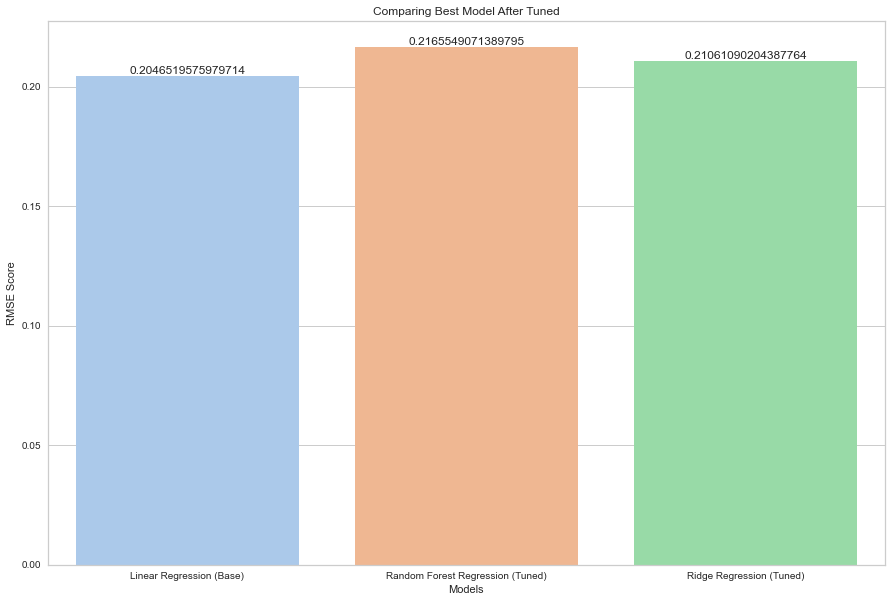

In [88]:
fig, ax = plt.subplots(figsize=(15,10))
models = ['Linear Regression (Base)','Random Forest Regression (Tuned)','Ridge Regression (Tuned)']
r2 = [rmse_test_linear,rmse_test_rf_tuned,rmse_test_ridge_tuned]
sns.barplot(x = models, y = r2, palette='pastel', ax=ax)
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.title('Comparing Best Model After Tuned (RMSE)')

labels = r2

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

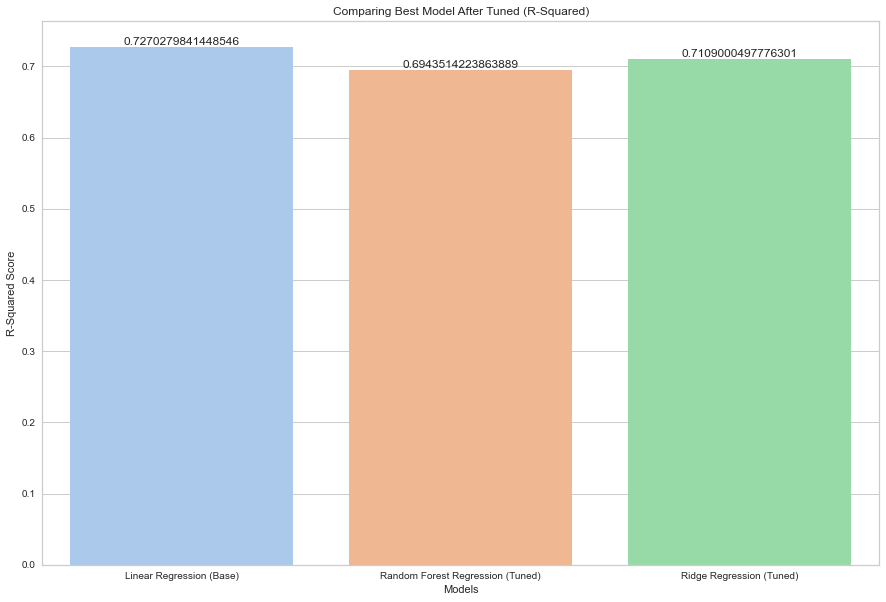

In [90]:
fig, ax = plt.subplots(figsize=(15,10))
models = ['Linear Regression (Base)','Random Forest Regression (Tuned)','Ridge Regression (Tuned)']
r2 = [r2_test_linear,r2_test_rf_tuned,r2_test_ridge_tuned]
sns.barplot(x = models, y = r2, palette='pastel', ax=ax)
plt.xlabel('Models')
plt.ylabel('R-Squared Score')
plt.title('Comparing Best Model After Tuned (R-Squared)')

labels = r2

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )

It seems that after tune the model, I still get result that linear regression give the best result compare to other model. So our best model is Linear Regression Model

## Feature Importance Best Model

In [105]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":linear_model.coef_})

,Feature,Coefficients
0,transaction date,338.351646
1,house age,-0.096763
2,distance to the nearest MRT station,-0.176827
3,number of convenience stores,0.087521
4,geometry,0.054586
